# HOJA 2

## Ejercicio 10
Tt = 64 MB
Tb = 1 KB
> Formato de la tabla:

| Bloque Fisico | Puntero/Estado |
|---|---|
| 0 | Puntero a otro bloque/final del fichero (EOF) |
| 1 | Puntero a otro bloque/final del fichero (EOF) |
| 2 | Puntero a otro bloque/final del fichero (EOF) |
| 3 | Puntero a otro bloque/final del fichero (EOF) |

- tiene N entradas = Tt/Tb = 2^26/2^10 = 2^16 -> 16 bits (bloque 0 no esta libre, usado para almacenar la tabla y marcado como final de fichero)
EOF = 0x0000 # 
- Otra opcion es añadir un bit extra y tener 17 bits y asignar el ultimo como final de fichero y bloque de almacenamiento para la tabla

El tamaño de entradas es 16bits (2bytes) (por bloque) * 64KB(Entrada) = 128Kbytes

## Ejercicio 11
En la siguiente figura se representa una tabla FAT y el contenido de cierto directorio: que incluye: el nombre del archivo, el tipo (F=archivo, D=directorio) y el número del bloque inicial.


| Bloque Fisico | Puntero/Estado |
|---|---|
| 0 | _ |
| 1 | _ |
| 2 | _ |
| 3 | 15 |
| . | _ |
| 15 | EOF |

| Nombre | Tipo | Bloque(inicio) |
|---|---|---|
| DATA.TXT | F | 3 |

El tamaño de bloque en este sistema de ficheros es de 512 bytes y que el sistema operativo siempre asigna los bloques empezando por el primer bloque libre (número inferior) disponible. Completar el estado final de las tablas tras realizar (en orden) las siguientes operaciones:
- Creación del fichero DATA1.TXT de tamaño 10 bytes.


| Bloque Fisico | Puntero/Estado |
|---|---|
| 0 | EOF |
| 1 | _ |
| 2 | _ |
| 3 | 15 |
| . | _ |
| 15 | EOF |

| Nombre | Tipo | Bloque |
|---|---|---|
| DATA.TXT | F | 3 |
| DATA1.TXT | F | 0 |

Creación del fichero DATA2.TXT de tamaño 1200 bytes.
> 1200 / 512 = nº bloques necesarios = 3 bloques.

| Bloque Fisico | Puntero/Estado |
|---|---|
| 0 | EOF |
| 1 | 2 |
| 2 | 4 |
| 3 | 15 |
| 4 | EOF |
| . | _ |
| 15 | EOF |

| Nombre | Tipo | Bloque |
|---|---|---|
| DATA.TXT | F | 3 |
| DATA1.TXT | F | 0 | 
| DATA2.TXT | F | 1 | 

Se añaden datos al archivo DATA.TXT que requieren 2 bloques más. 

| Bloque Fisico | Puntero/Estado |
|---|---|
| 0 | EOF |
| 1 | 2 |
| 2 | 4 |
| 3 | 15 |
| 4 | EOF |
| 5 | 6 |
| 6 | EOF |
| . | _ |
| 15 | 5 |

| Nombre | Tipo | Bloque |
|---|---|---|
| DATA.TXT | F | 3 |
| DATA1.TXT | F | 0 | 
| DATA2.TXT | F | 1 | 

Creación del directorio LOGS. 

| Bloque Fisico | Puntero/Estado |
|---|---|
| 0 | EOF |
| 1 | 2 |
| 2 | 4 |
| 3 | 15 |
| 4 | EOF |
| 5 | 6 |
| 6 | EOF |
| . | _ |
| 15 | 5 |

| Nombre | Tipo | Bloque |
|---|---|---|
| DATA.TXT | F | 3 |
| DATA1.TXT | F | 0 | 
| DATA2.TXT | F | 1 | 

Creacion del fichero RESULTS.JPG de tamaño 2 Kbytes

## Ejercicio 13

In [1]:
$ truncate --size 100M fs.ext2 # Reserva 100M para el archivo fs.ext2
$ mkfs.ext2 fs.ext2 # crea un sistema de ficheros tipo ext2
# Montar el sistema de ficheros dentro de un fichero
$ sudo mount -t ext2 -o loop ./fs.ext2 ./mnt/ 

# Montamos unos cuantos ficheros
$ echo "123456789" > /mnt/dir/small.txt
$ dd if=/dev/random of=/mnt/dir/big bs=1024 count=5120
$ dd if=/dev/random of=/mnt/dir/sparse bs=1024 count=1 seek=5192 # Fichero con fragmentacion interna (huecos en el bloque)

$ debugfs -R "stat <12>" ../fs.ext2



SyntaxError: invalid decimal literal (1315422582.py, line 1)

## Ejercicio 16
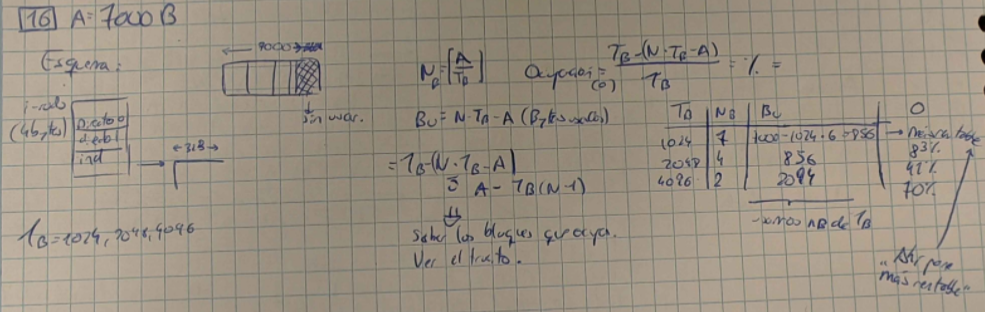

### Ejercicio 14 
Cuantas entradas se pueden almacenar en un bloque de 4kb.

Estructura del directorio:

| Inodo | Longitud | Nombre |
|---|---|---|
| 32b | 8b | hasta 256 chars |

Se pueden almacenar:
1 entrada ocupa: 
- 32b = 4 bytes(Inodo)
- 8b = 1 byte (Longitud)
- 256 chars = 256 bytes
4 + 1 + 256 = 261 bytes => Entradas/bloque = 4*2^10 (4KB tamaño de bloque) / 261 bytes (entrada) = 15 entradas.
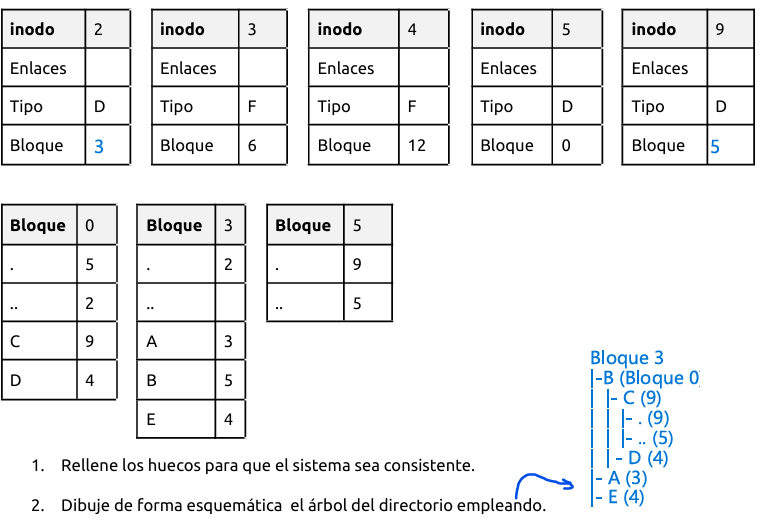

### Ejercicio 17

- Tamaño de bloque: 512bytes (2^9)
- T direcciones: 16 bits Total (2^16 bloques) (2 bytes)
- 10 punteros a bloque
- 1 puntero indirecto simple
- 1 puntero indirecto doble

>¿Cual es el tamaño maximo de un fichero en este sistema?

Total de bloques = 10 + I + I^2

I(indice/bloque) =  512 (TB) / 2 (TD) = 256 entradas (2^8)

Total = 10 + 2^8 +2^16 ~ 2^16

Tamaño = TB * Total = 2^16 * 2^9 bytes = 2^25 (32MB)

>¿Cuantos bloques del disco ocupa este nuevo fichero en disco? (No me he enterado ha ido muy rapido Paula ha preguntado pedir apuntes)
Fichero (sparse)
Bloques = 1

¿Donde esta el bloque de datos?
1000 byte TB = 1 (datos)
10k (Ind) => TB = 1+ 1(Ind) = 2